##Step 1 - Data parsing

In [11]:
'''
summarize based on HQ state: # companies in that state avg Annual revenue Max of Employee size
'''

#notes given by - Mehdi Norouzi

'\nsummarize based on HQ state: # companies in that state avg Annual revenue Max of Employee size\n'

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [13]:
#in this block of code we are just storing our csv file to store as 'File_Name'

File_Name = '/content/Top 50 US Tech Companies 2022 - 2023.csv'

In [14]:
def CSV_Data_Reader(File_Name, Seprator, NonNumerical):
    '''
    This function takes a csv file and generate a dictionary
    The keys of the dictionary are the column names
    Values of the dictionary are columns of the data
    '''
    import csv
    with open(File_Name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=Seprator)    
        line_count=0
        Data=[]
        for row in csv_reader:
            if line_count==0:
                Header=row
            else:
                Data.append(row)
            line_count=line_count+1

    Data_dict={}
#I removed a section to include the non numerical data 
    idx=0
    for name in Header:
        Data_dict[name]=[]
        for row in Data:
            Data_dict[name].append(row[idx])
        idx=idx+1
    return Data_dict


In [15]:
#this line will use the function created in class to create a dictionary named Data

Data=CSV_Data_Reader('/Users/brettkarsten/Library/Mobile Documents/com~apple~CloudDocs/Python : R/final project/Top 50 US Tech Companies 2022 - 2023.csv',',',['DateTime'])

In [16]:
#how many columns of data do we have? (This is correct and verified by excel sheet)

len(Data)

10

In [17]:
#This allows us to see what each column of data is called

print(list(Data))

['Company Name', 'Industry', 'Sector', 'HQ State', 'Founding Year', 'Annual Revenue 2022-2023 (USD in Billions)', 'Market Cap (USD in Trillions)', 'Stock Name', 'Annual Income Tax in 2022-2023 (USD in Billions)', 'Employee Size']


In [18]:
#I am pulling the specific columns I will be using for statistics and visualizations
#This data will be used for the main portion of project

#This code iterates through the data columns and selects the ones mentioned below and puts them into a new dict. named DataCut

DataCut={}

for i in Data:
  if i in ['HQ State','Annual Revenue 2022-2023 (USD in Billions)' ,'Employee Size', 'Company Name']:
      DataCut[i]=Data[i]

In [19]:
#Checking to see the length of new DataCut dictionary. 3 is correct
len(DataCut)

4

In [20]:
#we can also print the column names that we have extracted with this block of code.

for i in DataCut: 
  print(i)

Company Name
HQ State
Annual Revenue 2022-2023 (USD in Billions)
Employee Size


In [21]:
#here we are just checking to see if the rows are still there. It should be 50 for each

print(len(DataCut['Annual Revenue 2022-2023 (USD in Billions)']))
print(len(DataCut['HQ State']))
print(len(DataCut['Employee Size']))
print(len(DataCut['Company Name']))

50
50
50
50


In [22]:
#checking to see that there are no none values
print(DataCut)

{'Company Name': ['Apple Inc.', 'Microsoft Corporation', 'Alphabet (Google)', 'Amazon', 'NVIDIA Corporation', 'Tesla', 'Meta Platforms', 'Broadcom Inc.', 'Oracle Corporation', 'Cisco Systems Inc.', 'Salesforce Inc.', 'Adobe Inc.', 'Texas Instruments Inc.', 'Advanced Micro Devices (AMD) Inc.', 'Qualcomm Inc.', 'Netflix', 'Intel Corporation', 'Intuit Inc.', 'IBM Corporation', 'Applied Materials Inc.', 'Booking Holdings', 'Analog Devices Inc.', 'ServiceNow Inc.', 'Automatic Data Processing', 'PayPal Holdings Inc.', 'Airbnb', 'Fiserv Inc.', 'Lam Research Corporation', 'Uber Technologies Inc.', 'Micron Technology', 'Equinix', 'Activision Blizzard', 'Palo Alto Networks Inc.', 'Synopsys Inc.', 'Cadence Design Systems Inc.', 'KLA Corporation', 'Arista Networks Inc.', 'VMware Inc.', 'Workday Inc.', 'Fortinet Inc.', 'Block Inc.', 'Snowflake Inc.', 'Roper Technologies', 'Microchip Technology Inc.', 'Autodesk Inc.', 'GlobalFoundries', 'IQVIA Holdings', 'Marvell Technology Inc.', 'Dell Technologies

In [23]:
#this part is just for the raw plot of companies by state 
#I researched around the internet to use this Counter technique because I kept running into problems trying to iterate through dictionary
from collections import Counter

#generating a list of states from the key
hq_states = DataCut['HQ State']

#Counter is used to count the occurrences of each state
state_counts = Counter(hq_states)

for state, count in state_counts.items():
    print(state, count)


California 33
Washington 2
Texas 4
New York 2
Connecticut 1
Massachusetts 1
New Jersey 1
Wisconsin 1
Idaho 1
Montana 1
Florida 1
Arizona 1
North Carolina 1


In [24]:
#This block was created to make visualizing the code easier; since there are repeated states within 
#the HQ State part of the dictionary; the code creates a list that just has only one of the repeats
#This code also adds the revnue according to the state 

state_data = Data['HQ State']
revenue_data = Data['Annual Revenue 2022-2023 (USD in Billions)']

#Created an empty dictionary
state_revenue = {}

#Loop through the data and add up the revenue for each state
for i in range(len(state_data)):
    state = state_data[i]
    revenue = float(revenue_data[i]) #converts to a float because they are all decimals 
    if state in state_revenue:
        state_revenue[state] += revenue
    else:
        state_revenue[state] = revenue


In [25]:

# Create a sorted list of states and their revenue
state_revenue_list = sorted(state_revenue.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted states and revenue as separate lists
states = [x[0] for x in state_revenue_list]
revenues = [x[1] for x in state_revenue_list]

##Step 2 - Raw Plots 



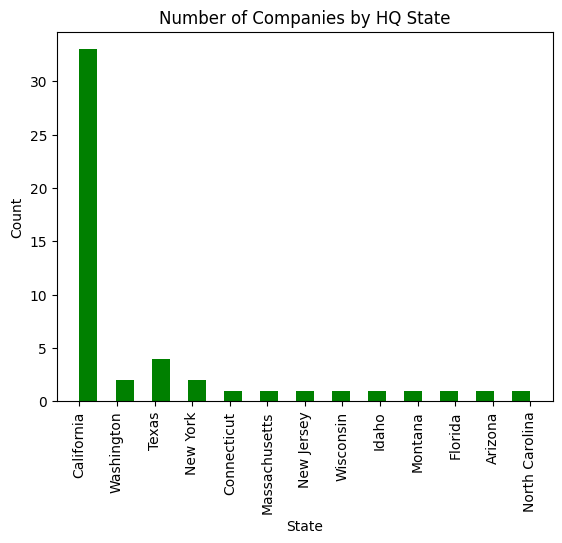

In [26]:
plt.hist(hq_states, bins=25, color='green') # playing with the color 
plt.xticks(rotation='vertical', ha='center') #changing the axis labels to vertical because they overlap
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of Companies by HQ State')
plt.show()

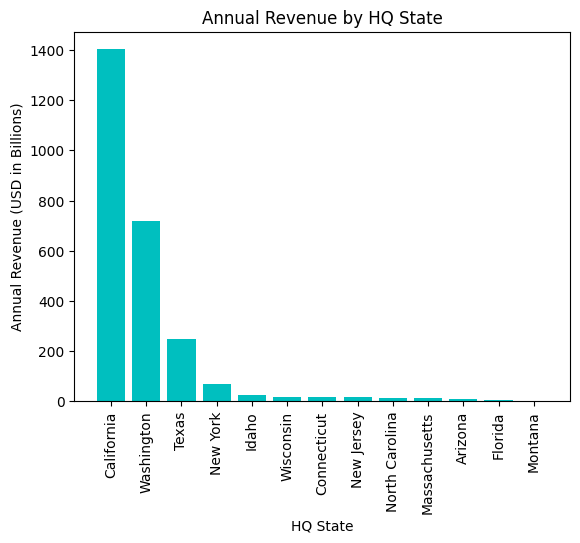

In [27]:
#This displays the total...not the average 

plt.bar(states, revenues, color='c')
plt.title('Annual Revenue by HQ State')
plt.xlabel('HQ State')
plt.xticks(rotation='vertical')
plt.ylabel('Annual Revenue (USD in Billions)')
plt.show()

##Part 3 - Statistics

In [28]:
# Here, we are creating a dictionary to store the grouped data
#each piece of data will be stored by its HQ state
#we are creating a dictionary within a dictionary so we can group the stats based on each state, which is the key 
data_grouped = {'Company Name': {}, 'Annual Revenue 2022-2023 (USD in Billions)': {}, 'Employee Size': {}}

# Here, the code will loop through the data for each HQ State
for i in range(len(DataCut['HQ State'])): #for each item in HQ state 
    state = DataCut['HQ State'][i] 
    company_name = DataCut['Company Name'][i]
    revenue = DataCut['Annual Revenue 2022-2023 (USD in Billions)'][i]
    employee_size = DataCut['Employee Size'][i]
    
    # making sure all the states are added 
    if state not in data_grouped['Company Name']:
        data_grouped['Company Name'][state] = []
        data_grouped['Annual Revenue 2022-2023 (USD in Billions)'][state] = []
        data_grouped['Employee Size'][state] = []
        
    # Appending each list with all of the information organized by state 
    data_grouped['Company Name'][state].append(company_name)
    data_grouped['Annual Revenue 2022-2023 (USD in Billions)'][state].append(revenue)
    data_grouped['Employee Size'][state].append(employee_size)


In [29]:
#we can see here it is all grouped and now we can run stats
print(data_grouped)

{'Company Name': {'California': ['Apple Inc.', 'Alphabet (Google)', 'NVIDIA Corporation', 'Meta Platforms', 'Broadcom Inc.', 'Cisco Systems Inc.', 'Salesforce Inc.', 'Adobe Inc.', 'Advanced Micro Devices (AMD) Inc.', 'Qualcomm Inc.', 'Netflix', 'Intel Corporation', 'Intuit Inc.', 'Applied Materials Inc.', 'ServiceNow Inc.', 'PayPal Holdings Inc.', 'Airbnb', 'Lam Research Corporation', 'Uber Technologies Inc.', 'Equinix', 'Activision Blizzard', 'Palo Alto Networks Inc.', 'Synopsys Inc.', 'Cadence Design Systems Inc.', 'KLA Corporation', 'Arista Networks Inc.', 'VMware Inc.', 'Workday Inc.', 'Fortinet Inc.', 'Block Inc.', 'Autodesk Inc.', 'Marvell Technology Inc.', 'HP Inc.'], 'Washington': ['Microsoft Corporation', 'Amazon'], 'Texas': ['Tesla', 'Oracle Corporation', 'Texas Instruments Inc.', 'Dell Technologies Inc.'], 'New York': ['IBM Corporation', 'GlobalFoundries'], 'Connecticut': ['Booking Holdings'], 'Massachusetts': ['Analog Devices Inc.'], 'New Jersey': ['Automatic Data Processin

In [30]:
# Create an empty dictionary to store the statistics
#this part was difficult for me, I got confused a lot 
#this was probably the hardest part of the project 
stats = {'Average Annual Revenue (USD in Billions)': {}, 'Total Number of Companies': {}, 'Max Employee Size': {}}

# Loop through the states in data_grouped
for state in data_grouped['Company Name']:
    #Convert the revenue values to numbers
    revenue_values = [float(val) for val in data_grouped['Annual Revenue 2022-2023 (USD in Billions)'][state]]
    
    #Calculate the average annual revenue
    #this takes the sum of all the revenue values for each state stored in the above loop
    #it divides it by the number of addends 
    avg_revenue = sum(revenue_values) / len(revenue_values)
    
    #Now I am storing the average revenue values in the appropriate stat part of the dictionary 
    stats['Average Annual Revenue (USD in Billions)'][state] = avg_revenue
    
    #Calculate the total number of companies
    #this just takes the length of how many companies are found in the same state
    total_companies = len(data_grouped['Company Name'][state])
    
    #This adds the information above to the appropriate place in dictionary 
    stats['Total Number of Companies'][state] = total_companies
    
    #Get the maximum employee size
    max_employee_size = 0 #starting at 0
    for employee_size in data_grouped['Employee Size'][state]: #this loops through the employee sizes for each state 
        if employee_size != 'Unknown': #cleaning up (not necessary but just showing)
            size = int(employee_size.replace(',', ''))
            if size > max_employee_size:
                max_employee_size = size
    
    #Adding the max employee size to the stats dictionary
    stats['Max Employee Size'][state] = max_employee_size


In [31]:
#Here I am just displaying what will be shown on each graph 
#I thought this was useful for looking at the graphs and having an idea how the plots should look

for state in stats['Average Annual Revenue (USD in Billions)']:
    print(state)
    print('Average Annual Revenue (USD in Billions):', stats['Average Annual Revenue (USD in Billions)'][state])
    print('Total Number of Companies:', stats['Total Number of Companies'][state])
    print('Max Employee Size:', stats['Max Employee Size'][state])
    print()


California
Average Annual Revenue (USD in Billions): 42.49515151515152
Total Number of Companies: 33
Max Employee Size: 190234

Washington
Average Annual Revenue (USD in Billions): 359.035
Total Number of Companies: 2
Max Employee Size: 1541000

Texas
Average Annual Revenue (USD in Billions): 62.462500000000006
Total Number of Companies: 4
Max Employee Size: 143000

New York
Average Annual Revenue (USD in Billions): 34.31
Total Number of Companies: 2
Max Employee Size: 345000

Connecticut
Average Annual Revenue (USD in Billions): 17.09
Total Number of Companies: 1
Max Employee Size: 20700

Massachusetts
Average Annual Revenue (USD in Billions): 12.57
Total Number of Companies: 1
Max Employee Size: 24450

New Jersey
Average Annual Revenue (USD in Billions): 16.67
Total Number of Companies: 1
Max Employee Size: 60000

Wisconsin
Average Annual Revenue (USD in Billions): 17.73
Total Number of Companies: 1
Max Employee Size: 44000

Idaho
Average Annual Revenue (USD in Billions): 27.15
Total

##Part 4 - Summary Plots

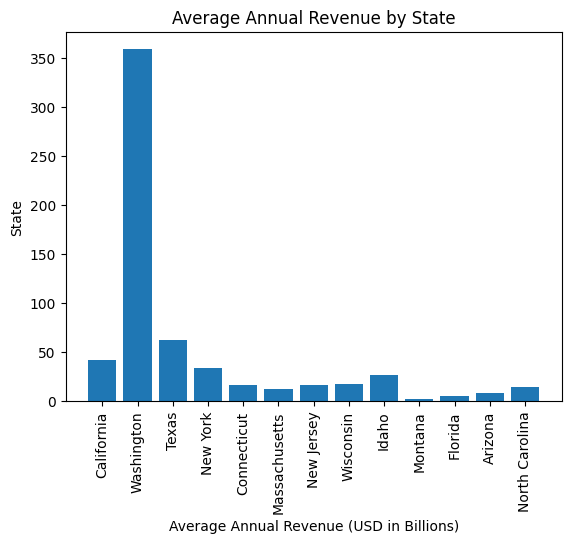

In [36]:
# Extracting the data and storing it in a different variable 
x_values = list(stats['Average Annual Revenue (USD in Billions)'].keys())
y_values = list(stats['Average Annual Revenue (USD in Billions)'].values())


plt.bar(x_values, y_values)
plt.xlabel('Average Annual Revenue (USD in Billions)')
plt.ylabel('State')
plt.title('Average Annual Revenue by State')
plt.xticks(rotation='vertical')
plt.show()


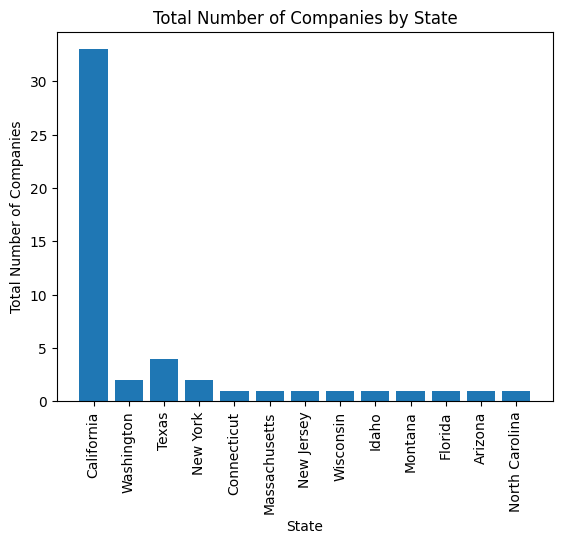

In [39]:
# Extracting the data and storing it in a different variable 
x_values = list(stats['Total Number of Companies'].keys())
y_values = list(stats['Total Number of Companies'].values())


plt.bar(x_values, y_values)
plt.xlabel('State')
plt.xticks(rotation='vertical')
plt.ylabel('Total Number of Companies')
plt.title('Total Number of Companies by State')
plt.show()


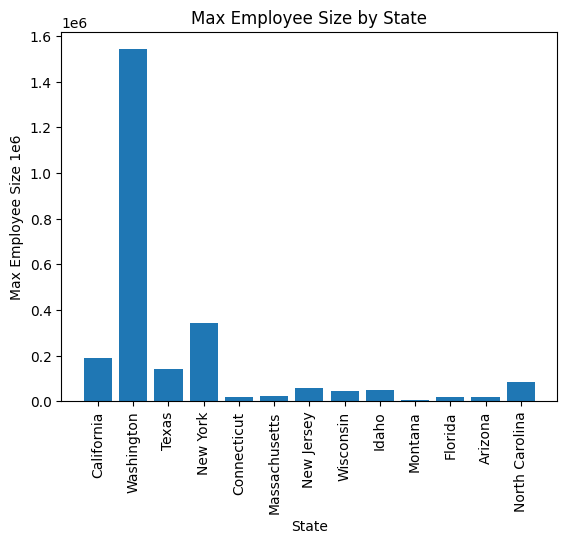

In [34]:
# Extracting the data and storing it in a different variable 
x_values = list(stats['Max Employee Size'].keys())
y_values = list(stats['Max Employee Size'].values())


plt.bar(x_values, y_values)
plt.xlabel('State')
plt.ylabel('Max Employee Size 1e6')
plt.title('Max Employee Size by State')
plt.xticks(rotation='vertical') #I have switched the orientation of the x labels because the names are quite long and will overlap horizontally
plt.show()


##Step 5 - Pandas / NumPy Verification

In [40]:
#putting all of the data into the data frame 

df_RAW=pd.read_csv('/Users/brettkarsten/Library/Mobile Documents/com~apple~CloudDocs/Python : R/final project/Top 50 US Tech Companies 2022 - 2023.csv')

In [ ]:
df_RAW

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


In [ ]:
#selecting the data I will be using 

df=df_RAW[['Company Name','HQ State','Annual Revenue 2022-2023 (USD in Billions)', 'Employee Size']].copy()
df

,Company Name,HQ State,Annual Revenue 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,California,387.53,164000
1,Microsoft Corporation,Washington,204.09,221000
2,Alphabet (Google),California,282.83,190234
3,Amazon,Washington,513.98,1541000
4,NVIDIA Corporation,California,26.97,22473
5,Tesla,Texas,81.46,127855
6,Meta Platforms,California,116.60,86482
7,Broadcom Inc.,California,34.41,20000
8,Oracle Corporation,Texas,46.07,143000
9,Cisco Systems Inc.,California,53.16,83300


In [41]:
#here i am showing how we will group and organize the different stats from the columns
#all of them are here and will be used for computing the graphs quickly along with the stats 


avg_revenue_by_state = df_RAW.groupby('HQ State')['Annual Revenue 2022-2023 (USD in Billions)'].mean()
total_companies_by_state = df_RAW.groupby('HQ State').size()
max_employee_size_by_state = df_RAW.groupby('HQ State')['Employee Size'].max()
stats_df = pd.concat([avg_revenue_by_state, total_companies_by_state, max_employee_size_by_state], axis=1)


In [43]:
stats_df.columns = ['Average Annual Revenue (USD in Billions)', 'Total Number of Companies', 'Max Employee Size']


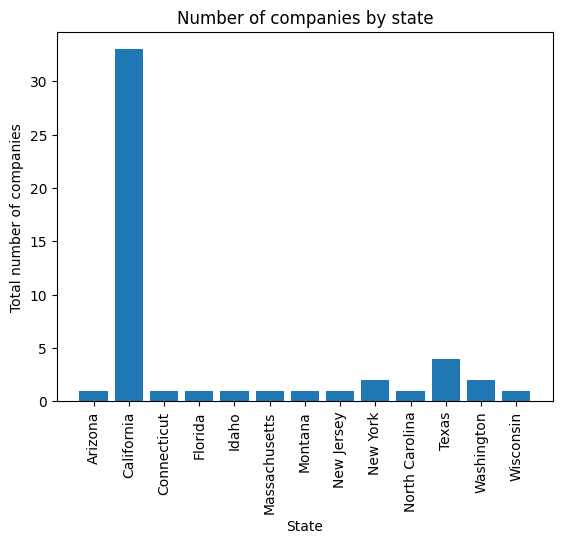

In [44]:
plt.bar(stats_df.index, stats_df['Total Number of Companies'])
plt.xlabel('State')
plt.ylabel('Total number of companies')
plt.title('Number of companies by state')
plt.xticks(rotation='vertical')
plt.show()


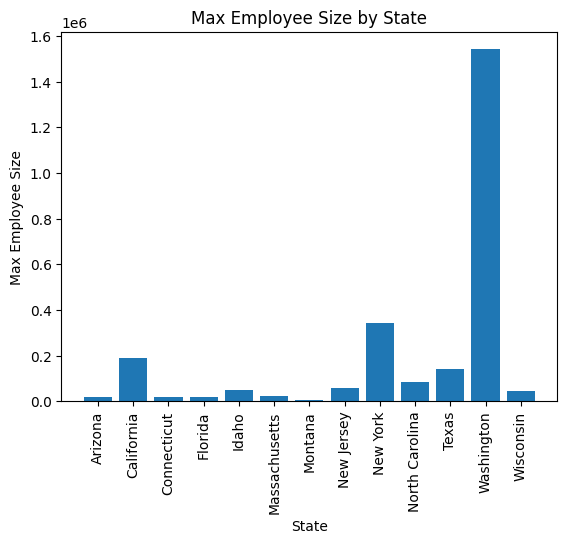

In [45]:
#just repeating what I've done above to show what data i am using 
max_employee_size_by_state = df_RAW.groupby('HQ State')['Employee Size'].max()

plt.bar(max_employee_size_by_state.index, max_employee_size_by_state.values)
plt.xlabel('State')
plt.ylabel('Max Employee Size')
plt.title('Max Employee Size by State')
plt.xticks(rotation='vertical')
plt.show()


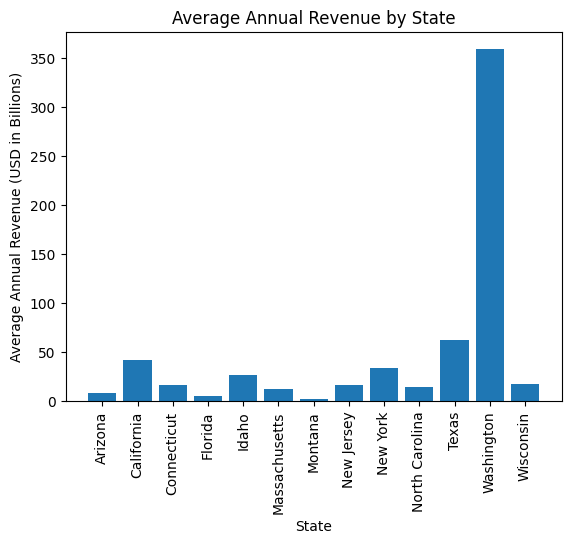

In [46]:
#repeating 
avg_revenue_by_state = df_RAW.groupby('HQ State')['Annual Revenue 2022-2023 (USD in Billions)'].mean()

plt.bar(avg_revenue_by_state.index, avg_revenue_by_state.values)
plt.xlabel('State')
plt.ylabel('Average Annual Revenue (USD in Billions)')
plt.title('Average Annual Revenue by State')
plt.xticks(rotation='vertical')
plt.show()


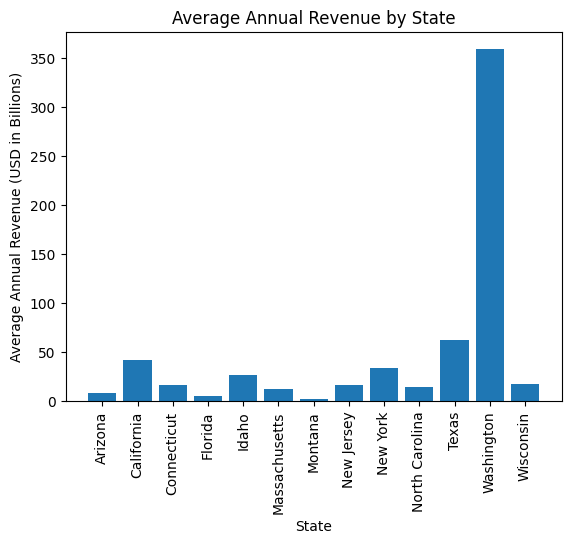

In [47]:
#NumPy
avg_revenue_by_state = df_RAW.groupby('HQ State')['Annual Revenue 2022-2023 (USD in Billions)'].mean()



plt.bar(avg_revenue_by_state.index, np.array(avg_revenue_by_state.values))
plt.xlabel('State')
plt.ylabel('Average Annual Revenue (USD in Billions)')
plt.title('Average Annual Revenue by State')
plt.xticks(rotation='vertical')
plt.show()



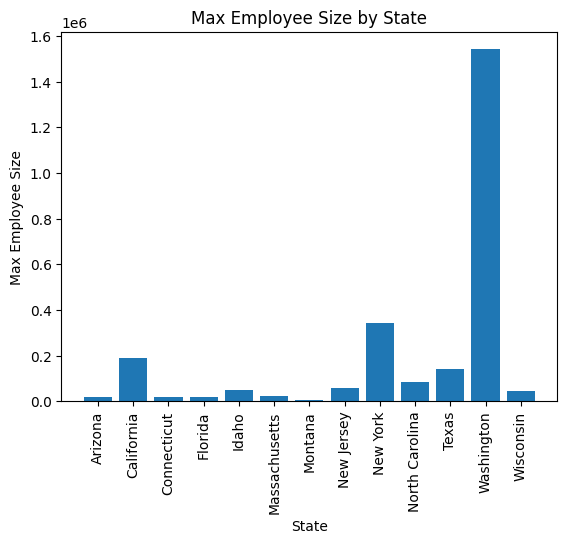

In [48]:
#NumPy

max_employee_size_by_state = df_RAW.groupby('HQ State')['Employee Size'].max()
states = np.array(max_employee_size_by_state.index)
max_employee_sizes = np.array(max_employee_size_by_state.values)

plt.bar(states, max_employee_sizes)
plt.xlabel('State')
plt.ylabel('Max Employee Size')
plt.title('Max Employee Size by State')
plt.xticks(rotation='vertical')
plt.show()

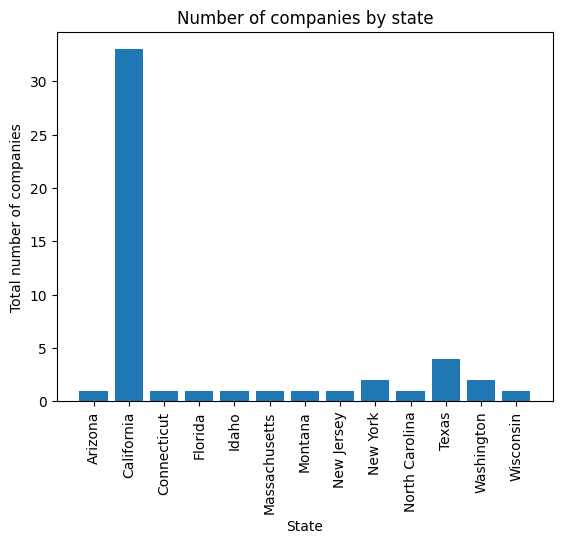

In [49]:
#Numpy

total_companies_by_state = df_RAW.groupby('HQ State').size()

plt.bar(total_companies_by_state.index, np.array(total_companies_by_state))
plt.xlabel('State')
plt.ylabel('Total number of companies')
plt.title('Number of companies by state')
plt.xticks(rotation='vertical')
plt.show()